##### [부교재] 3장 미래를 예측하는 데이터 분석

### 3.1 국내 프로야구 선수의 다음 해 연봉 예측하기

### 바로가기

- [<Step1. 탐색> 프로야구 연봉 데이터 살펴보기](#<Step1.-탐색>-프로야구-연봉-데이터-살펴보기)
    - [프로야구 연봉 데이터셋의 기본 정보]
    - [회귀 분석에 사용할 피처 살펴보기]
- [<Step2. 예측> : 투수의 연봉 예측하기](#<Step2.-예측>-:-투수의-연봉-예측하기)
    - [피처들의 단위 맞춰주기 : 피처 스케일링]
    - [피처들의 단위 맞춰주기 : one-hot-encoding]
    - [피처들의 상관관계 분석]
    - [회귀 분석 적용하기]
- [<Step3. 평가> : 예측 모델 평가하기](#<Step3.-평가>-:-예측-모델-평가하기)
    - [어떤 피처가 가장 영향력이 강한 피처일까]
    - [예측 모델의 평가]
    - [회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인]
    - [믿을만한 피처로 다시 학습하기]
- [<Step4. 시각화> : 분석 결과의 시각화](#<Step4.-시각화>-:-분석-결과의-시각화)
    - [예상 연봉과 실제 연봉 비교]

-----

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")   # 경고 메시지 무시하기 never print matching warnings

# <Step1. 탐색> 프로야구 연봉 데이터 살펴보기

### [프로야구 연봉 데이터셋의 기본 정보]
- 국내 프로야구 선수 152명에 대한 승, 패, 홈런 등의 22개 특성 변수(피처)에 대한 데이터
- 타겟 변수(피처)는 '연봉(2018)'
- 변수 관련 몇 가지 야구 용어 
    - 이닝: 양 팀이 공격과 수비를 한 번씩 하면 1 이닝, 야구는 9이닝이 한 경기
    - 승리 투수(pitcher) 조건: 승-패-세-홀드 
    - 삼진: 타자가 투수의 공을 세 번 못쳐서 아웃당하는 것
    - BABIP(Batting Average on Balls In Play)는 인플레이 타구중에서 안타가 된 비율
    - LOB% (Left on Base Percentage) 3아웃으로 이닝이 끝난 상황에서 누상에 남아 잔루 처리된 비율 
    - ERA(Earned Run Average): 투수를 평가하는 지표 중 하나로 방어율을 의미
    - WAR(Win Above Replacement): 대체선수 대비 승리 기여도

In [3]:
# Data Source : http://www.statiz.co.kr/

pitcher_file_path = './pitcher_stats_2017.csv'
batter_file_path = './batter_stats_2017.csv'
pitcher = pd.read_csv(pitcher_file_path)
batter = pd.read_csv(batter_file_path)

In [4]:
pitcher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [5]:
pitcher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [6]:
print(pitcher.shape)

(152, 22)


-----

In [7]:
### [참고] 주교재 8장 그래프 만들기
# import matplotlib.font_manager as fm
# fm.fontManager.ttflist # 사용 가능한 폰트 확인
# [f.name for f in fm.fontManager.ttflist]

import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인합니다.

{'Agency FB',
 'Albany AMT',
 'Algerian',
 'AlternateGothic2 BT',
 'Ami R',
 'Arial',
 'Arial Rounded MT Bold',
 'Arial Symbol',
 'Arial Unicode MS',
 'Avenir Next for SAS',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'CSongGB18030C-Light',
 'CSongGB18030C-LightHWL',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Cumberland AMT',
 'Curlz MT',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Ebrima',
 'Edwa

In [8]:
my_list = [0, 1, 2]
new_list = [10*i for i in my_list]
new_list

[0, 10, 20]

In [9]:
my_dic = {"월": "프로그래밍", "화": "댄스", "수": "영화보기"}
dic1 = [v for v in my_dic.values()]
dic2 = [v for (k, v) in my_dic.items()]
print(dic1)
print(dic2)

['프로그래밍', '댄스', '영화보기']
['프로그래밍', '댄스', '영화보기']


In [11]:
### [참고] 주교재 8장 그래프 만들기
# import matplotlib.pyplot as plt
# plt.rcParams.update({'font.family' : 'Malgun Gothic'})

mpl.rc('font', family='NanumGothicOTF') # 자신의 OS에 존재하는 한글 폰트를 선택
# 원하는 한글 폰트가 없다면, http://hangeul.naver.com/2017/nanum 에서 설치
mpl.rc('font', family='NanumGothic') 

###### 예측할 대상인 '연봉'에 대한 정보

In [12]:
pitcher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


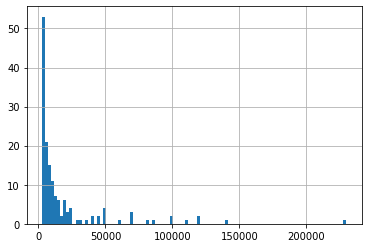

In [13]:
pitcher['연봉(2018)'].hist(bins=100); # 2018년 연봉 분포를 출력합니다.

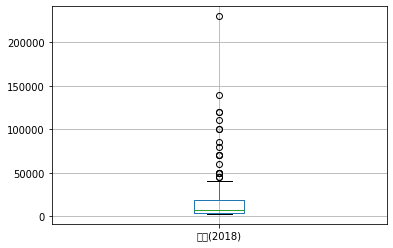

In [14]:
pitcher.boxplot(column=['연봉(2018)']); # 연봉의 Boxplot을 출력

-----

### [회귀 분석에 사용할 피처 살펴보기]
- '선수명', '팀명'과 같이 그래프로 표현할 수 없는 변수들을 제외한 뒤, 모든 수치형 변수들의 분포를 시각화하기
- 몇 개의 변수들은 불균형 분포이고 피처마다 단위가 다름을 확인

In [15]:
# '선수명', '팀명' 제외
pitcher_features_df = pitcher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [16]:
# 피처(변수) 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 18]
    fig = plt.figure(1)   # 1: a unique identifier for the figure, Figure.number attribute
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)  # 5행 5열의 subplot을 만들고 이 중 i+1번째 subplot, subplot 번호는 1부터 시작
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
#     plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    plt.subplots_adjust(hspace=0.4)   # 서브플롯 제목과 x 축 눈금이 겹쳐보이는 현상 해결
    plt.show()  # 생성된 모든 figure 보여주기

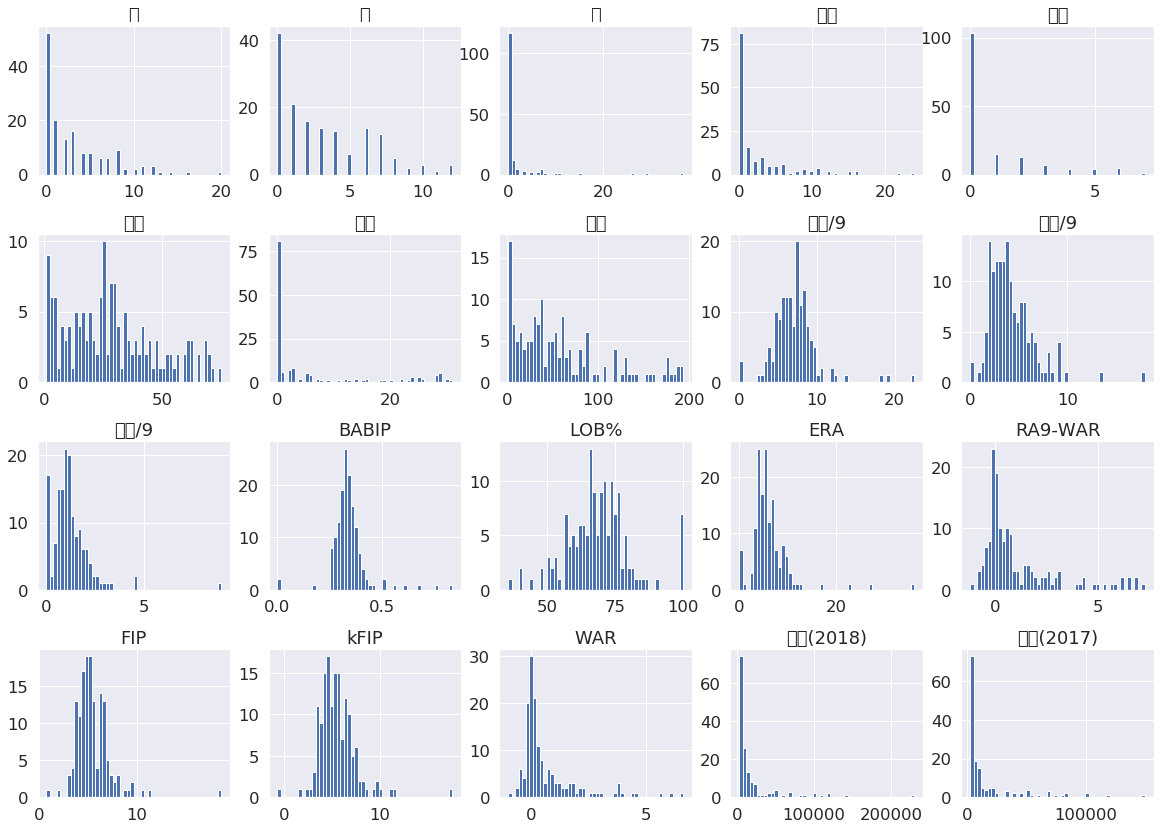

In [97]:
plot_hist_each_column(pitcher_features_df)

-----

# <Step2. 예측> : 투수의 연봉 예측하기

### [피처들의 단위 맞춰주기 : 피처 스케일링]
- 여러 피처 스케일링 방법 중 표준화 방법 적용
    - 표준화: (X - X_평균) / X_표준편차

In [17]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력
pd.options.mode.chained_assignment = None

In [18]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [19]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
pitcher_df = standard_scaling(pitcher, scale_columns)

In [20]:
pitcher_df = pitcher_df.rename(columns={'연봉(2018)': 'y'})
pitcher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


-----

### [피처들의 단위 맞춰주기 : one-hot-encoding]
- 연속형이 아닌 범주형 피처들 정규화하기: 원핫 인코딩

In [21]:
# 팀명 피처를 one-hot encoding으로 변환
# 주의! pd.get_dummies()에 데이터 프레임을 넣으면 "원래변수명_카테고리명", 시리즈를 넣으면 "카테고리명"으로 생성

team_encoding = pd.get_dummies(pitcher_df[['팀명']])
team_encoding.head()

,팀명_KIA,팀명_KT,팀명_LG,팀명_NC,팀명_SK,팀명_두산,팀명_롯데,팀명_삼성,팀명_한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [22]:
# 팀명 피처를 one-hot encoding으로 변환
# 주의! pd.get_dummies()에 데이터 프레임을 넣으면 "원래변수명_카테고리명", 시리즈를 넣으면 "카테고리명"으로 생성

team_encoding = pd.get_dummies(pitcher_df['팀명'])
pitcher_df = pitcher_df.drop('팀명', axis=1)
pitcher_df = pitcher_df.join(team_encoding)  # join()은 merge와 비슷한데 행 인덱스를 기준으로 결합

In [23]:
team_encoding

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,0,0,1
148,1,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,1,0,0
150,0,0,0,0,0,0,0,1,0


In [24]:
pitcher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [25]:
team_encoding_drop1 = pd.get_dummies(pitcher['팀명'], drop_first = True)
team_encoding_drop1

,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,0,1
148,0,0,0,0,0,0,0,0
149,0,0,0,0,0,1,0,0
150,0,0,0,0,0,0,1,0


-----

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리: 앞에서 y를 먼저 분리한 후 X, y를 넣어줌
X = pitcher_df[pitcher_df.columns.difference(['선수명', 'y'])]  # '선수명', 'y' 변수 제외
y = pitcher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

### 주교재 15장에서는 df에 대해 분리하고, 이후 df_train, df_test 각각에 대해 y를 분리함
# df_train, df_test = train_test_split(df,
#                                      test_size = 0.3,          
#                                      stratify = df['income'],  
#                                      random_state = 1234)     

In [27]:
pitcher_df.columns.difference(['선수명', 'y'])

Index(['BABIP', 'ERA', 'FIP', 'KIA', 'KT', 'LG', 'LOB%', 'NC', 'RA9-WAR', 'SK',
       'WAR', 'kFIP', '경기', '두산', '롯데', '볼넷/9', '블론', '삼성', '삼진/9', '선발', '세',
       '승', '연봉(2017)', '이닝', '패', '한화', '홀드', '홈런/9'],
      dtype='object')

##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [28]:
# 회귀 분석 계수를 학습하기 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [29]:
# 학습된 계수를 출력
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


In [30]:
X.columns

Index(['BABIP', 'ERA', 'FIP', 'KIA', 'KT', 'LG', 'LOB%', 'NC', 'RA9-WAR', 'SK',
       'WAR', 'kFIP', '경기', '두산', '롯데', '볼넷/9', '블론', '삼성', '삼진/9', '선발', '세',
       '승', '연봉(2017)', '이닝', '패', '한화', '홀드', '홈런/9'],
      dtype='object')

In [31]:
print('intercept ', lr.intercept_)

intercept  18640.47296454434


In [32]:
pd.DataFrame({'Predictor': X.columns, 'coefficient': lr.coef_})

,Predictor,coefficient
0,BABIP,-1481.017339
1,ERA,-416.687366
2,FIP,-94136.236492
3,KIA,-1560.862052
4,KT,1572.004722
5,LG,-747.049524
6,LOB%,-1375.538303
7,NC,-523.546876
8,RA9-WAR,3959.106537
9,SK,898.376390


-----

# <Step3. 평가> : 예측 모델 평가하기

### [어떤 피처가 가장 영향력이 강한 피처일까]
- 회귀 분석은 statsmodel 라이브러리의 OLS 클래스로도 실행 가능
- OLS 클래스의 summary() 함수를 사용하면 계수에 대한 자세한 분석 내용 제공
    -  OLS(Ordinary Least Squares): 예측값과 실제값의 차이(오차)의 제곱합이 최소가 되는 해를 구하는 방법

In [52]:
# !pip install statsmodels

In [33]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행
X_train = sm.add_constant(X_train)   # 1로 채워진 const 칼럼 추가, 상수항이 있어야 회귀 분석 수행
model = sm.OLS(y_train, X_train).fit()
print(f"num of samples: {len(X_train)}")
print(f"num of predictors: {len(X_train.columns)-1}")  # 28
model.summary()

num of samples: 121
num of predictors: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           7.70e-42
Time:                        14:48:25   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.44e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

[회귀 분석 결과 해석]
- R-squared(결정계수), Adj. R-squared(수정 결정계수)
    - 회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는지(회귀모델 적합도)를 평가
    - 결정계수: 오차(residual, 실제값과 예측값의 차이)의 총 제곱합에 대한 회귀식으로 설명된 편차 제곱합의 비율
    - 수정 결정계수: 결정계수의 예측변수 개수가 많아질수록 커지는 문제를 보정한 지표, 표본의 크기와 예측변수의 개수를 고려하여 계산
    - 1에 가까울수록 설명력 높음
    
    
- AIC(Akaike’s Information Criteria)
    - 회귀모델 적합도를 측정
    - 값이 작을수록 좋음
    - $𝐴𝐼𝐶 = 𝑛*𝑙𝑜𝑔\frac{오차제곱합}{n} + 2*𝑝$,     $n$: 표본의 크기, $p$: 예측변수의 개수
    
    
- BIC(Bayesian Information Criteria)
    - 회귀모델 적합도를 측정
    - 값이 작을수록 좋음
    - $𝐵𝐼𝐶 = 𝑛*𝑙𝑛\frac{오차제곱합}{𝑛} + 𝑝*𝑙𝑛(𝑛)$ 
    
    
- F-statistic(F-통계량)
    - 회귀분석의 유의성 검정
    - H0: 모든 예측 변수의 계수는 0이다.
    - Prob (F-statistic): p-value를 의미함, 이 값이 0.05 보다 작으므로 회귀 분석이 유의미한 결과를 가진다는 의미
    
    
- P>|t|
    - 각 피처의 t-statistic이 얼마나 유의미한지에 대한 p-value를 나타냄
    - H0: 해당 예측 변수의 계수는 0이다.
    - 'WAR', '연봉(2017)', '한화' 3개 피처의 p-value가 0.05 미만이므로 유의미한 피처들이라는 결론
    
    
- 오차가 오차항의 가정(독립성, 등분산성, 정규성)을 심각하게 위반하면 회귀모델의 통계적 추론 신뢰도 저하    
    - Durbin-Watson
        - 오차들간에 자기상관(auto-correlation)이 있는지 검정
        - 값이 2이면 자기상관이 없음, 0이면 양의 자기상관, 4이면 음의 자기상관
    - Omnibus
        - 오차가 정규분포를 따르는지 검정
        - 왜도와 첨도 이용
        - H0: 오차는 정규분포를 따른다.
    - Jarque-Bera
        - 오차가 정규분포를 따르는지 검정
        - 왜도와 첨도 이용
        - Omnibus 검정 확인 용도
    - Skew(왜도)
        - 0에 가까울수록 정규분포, 0보다 클수록 오른쪽 꼬리가 길고, 0보다 작을수록 왼쪽 꼬리가 긴 분포
    - Kurtosis(첨도)
        - 0에 가까울수록 정규분포, 0보다 클수록 정규분포 보다 꼬리가 두껍고, 0보다 작을수록 가운데가 위로 뾰족
    - Condition Number
        - 예측변수에 대한 예측값 변동의 민감도로 다중공선성이 있으면 변동성이 커짐
        - 30 이하이면 안정적임
    - No. Observations
        - 훈련 샘플 수 : 121
    - Df Residuals
        - No. Observations - 피처 수 : 121 - 28 = 93
    - Df Model
        - 피처 수 - 1 : 28 - 1 = 27
    - Log-Likelihood
        - 타겟 변수가 정규분포라 가정했을 때 그 우도
        - 로그 우도도 결정계수와 마찬가지로 예측 변수가 많아지면 증가

In [34]:
# 생성된 상수항 확인
X_train.head()

,const,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
94,1.0,0.544959,0.708951,-0.548806,1,0,0,-2.460666,0,-0.665457,...,-0.105959,-0.624825,-0.306452,-0.827554,-0.463349,-1.052812,-1.008613,0,-0.585705,-1.189625
118,1.0,-0.016931,-0.611056,0.386499,0,1,0,1.404205,0,-0.410536,...,-0.548038,-0.624825,-0.306452,-0.827554,-0.499282,-0.774469,-1.008613,0,-0.364245,0.776804
109,1.0,-0.185498,0.399349,1.022507,0,0,0,-0.079629,0,-0.584099,...,-0.311084,-0.317136,-0.306452,-0.568731,-0.547193,-0.909664,-0.689219,0,-0.585705,0.324526
5,1.0,-0.578820,-0.721456,-0.580874,0,1,0,0.653661,0,2.963100,...,0.130995,2.041816,-0.306452,1.243035,0.738417,2.048726,2.185327,0,-0.585705,-0.088425
75,1.0,-0.084357,0.245749,-0.067792,1,0,0,-1.002712,0,-0.594947,...,-0.219131,-0.624825,-0.306452,-0.568731,-0.459357,-0.853995,-0.689219,0,0.300137,-0.560368


##### 피처들의 영향력을 보기 위해 계수 값들을 시각화하기

In [35]:
# 한글 출력을 위한 사전 설정
# mpl.rc('font', family='AppleGothic')
plt.rcParams.update({'font.family' : 'Malgun Gothic'})
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환
# coefs =model.params.tolist()
# coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

In [36]:
type(model.params)

pandas.core.series.Series

In [37]:
x_labels[:3]

['const', 'BABIP', 'ERA']

In [38]:
len(x_labels)

29

In [39]:
model.params.index

Index(['const', 'BABIP', 'ERA', 'FIP', 'KIA', 'KT', 'LG', 'LOB%', 'NC',
       'RA9-WAR', 'SK', 'WAR', 'kFIP', '경기', '두산', '롯데', '볼넷/9', '블론', '삼성',
       '삼진/9', '선발', '세', '승', '연봉(2017)', '이닝', '패', '한화', '홀드', '홈런/9'],
      dtype='object')

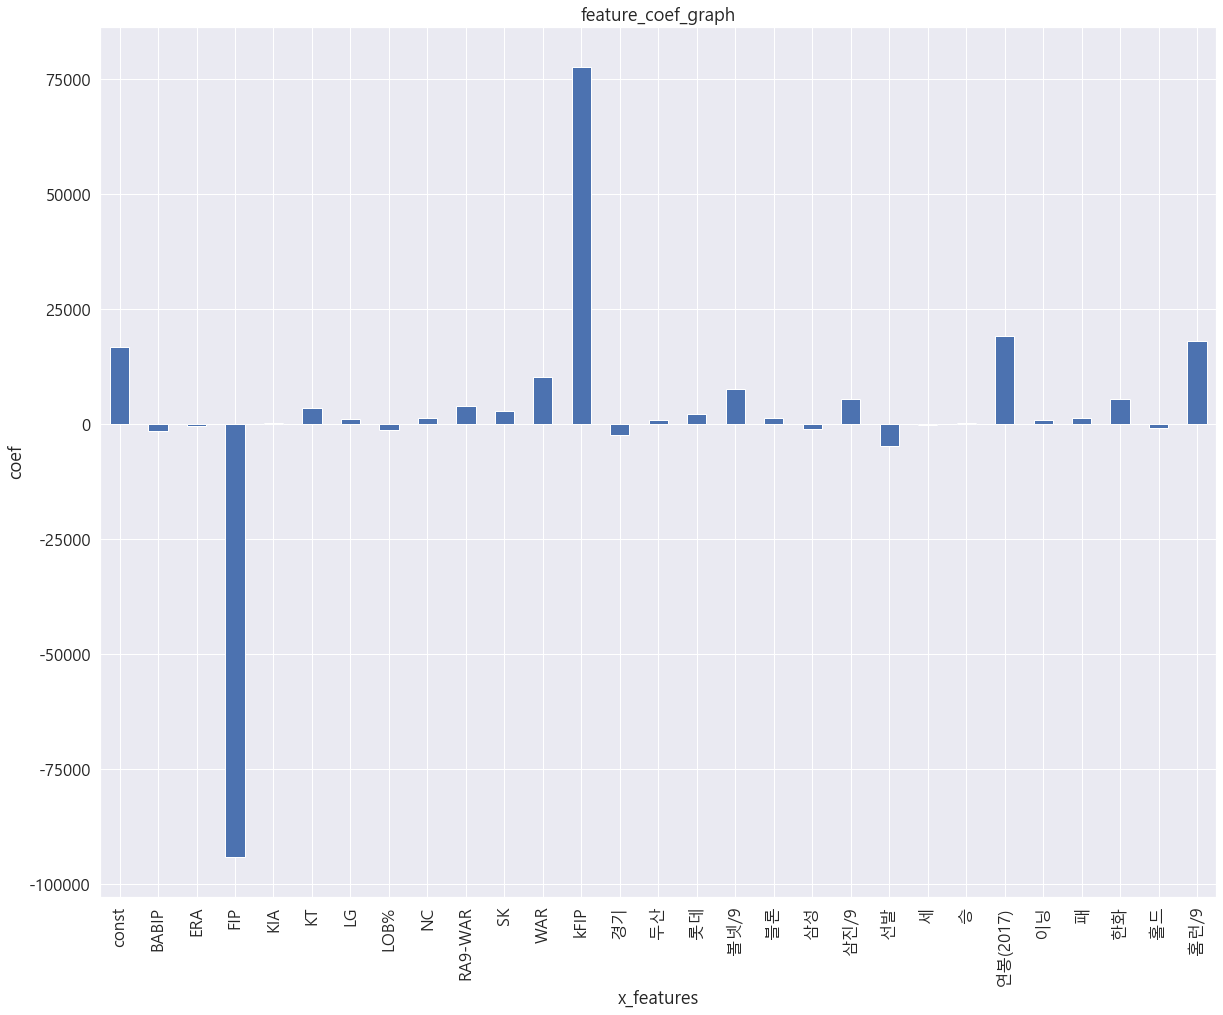

In [124]:
# 회귀 계수를 출력
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결
# ax = coefs_series.plot(kind='bar')
ax = model.params.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels);

-----

### [예측 모델의 평가]
- sklearn의 LinearRegression 클래스로 결정계수와 RMSE(Root Mean Squared Error) 출력하기

In [40]:
# 학습 데이터와 테스트 데이터로 분리
X = pitcher_df[pitcher_df.columns.difference(['선수명', 'y'])]   # '선수명', 'y' 제외
y = pitcher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [41]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

##### R2 score
- 학습 데이터셋의 결정계수가 평가 데이터셋의 결정계수보다 많이 크다면 오버피팅 의심  

In [42]:
# 회귀 분석 모델을 평가합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9276949405576705
0.8860171644977818


##### RMSE score
- 값이 클수록 예측이 부정확하다는 의미

In [43]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7282.718684746374
14310.69643688913


-----

### [피처들의 상관관계 분석]

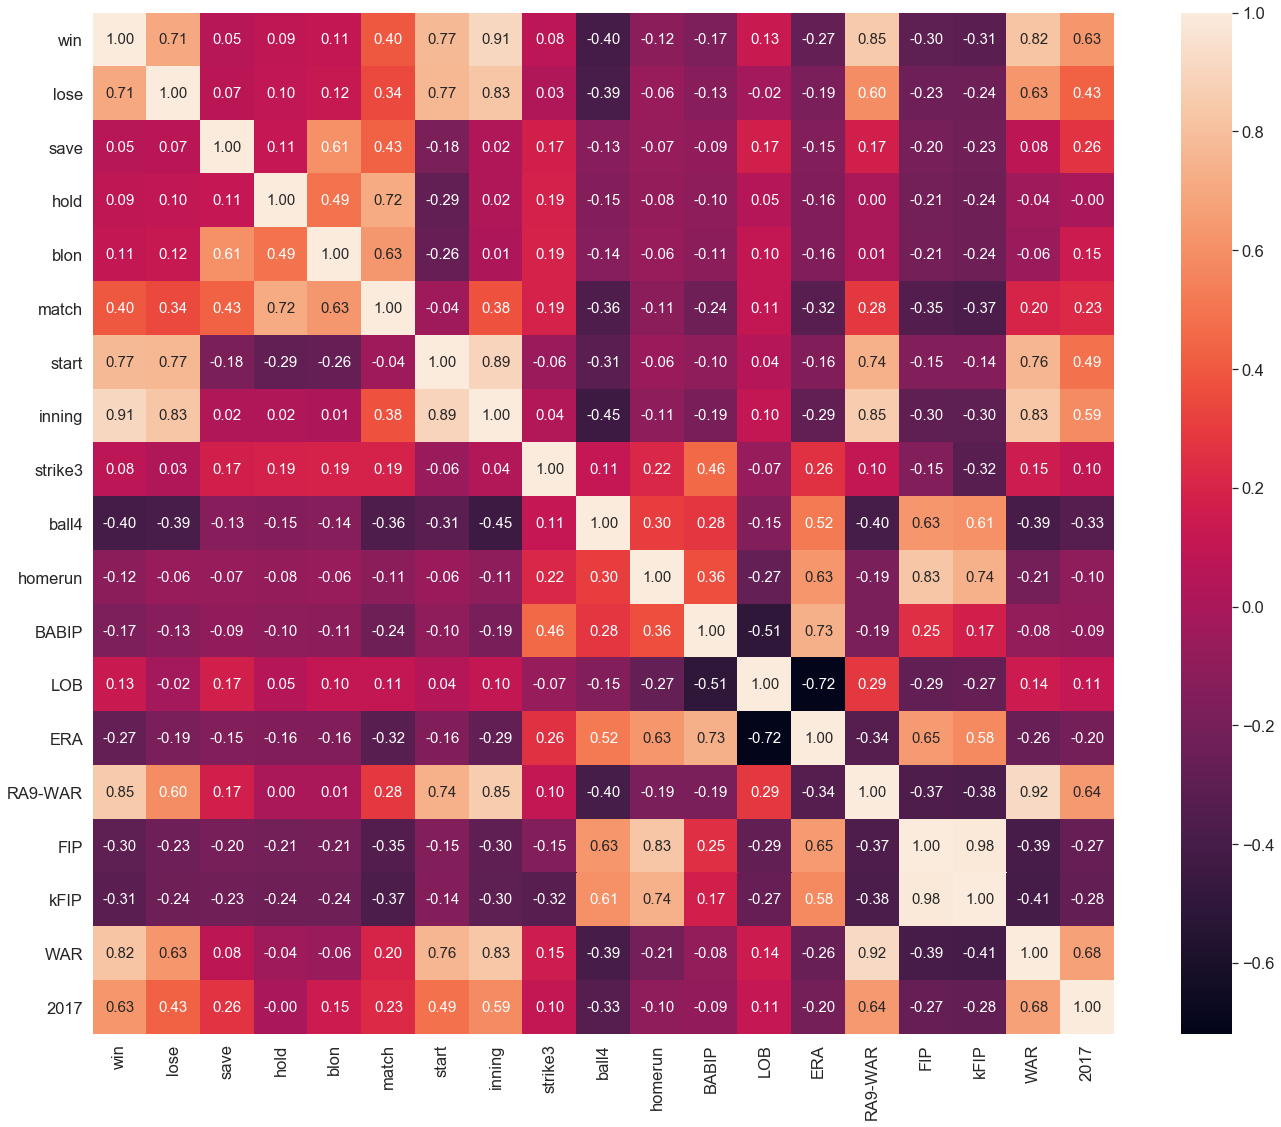

In [44]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산
corr = pitcher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화
plt.rc('font', family='NanumGothic')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',   # 소수점 이하 2자리 실수형
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

-----

### [회귀분석 예측 성능을 높이기 위한 방법 : 다중공선성 확인]
- 다중공선성(예측변수들 간에 존재하는 선형관계)이 존재하면, 즉, 예측변수들 간 상관계수가 1에 가까울수록 회귀계수 추정량의 분산이 커져 예측정확도가 저하되고 회귀모델에 대한 가설검정이 무의미해짐
- 주로 가장 큰 VIF 값이 10을 넘으면 다중공선성 의심
    - 예측변수 $x_j$ 의 분산팽창인자(VIF, Variance Inflation Factor):   $VIF_j = \frac{1}{𝟏 − R_j^𝟐}$ 
        - $R_j^2$ : 예측변수 $x_j$ 를 다른 예측변수들에 대하여 회귀분석 할 때의 결정계수

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# 피처마다의 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # X.values array의 i번째 칼럼의 VIF 계산
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


In [47]:
X.head()

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
0,0.016783,-0.587056,-0.971030,0,0,0,0.446615,0,3.174630,1,...,0.672099,2.452068,-0.306452,3.313623,2.734705,2.645175,1.227145,0,-0.585705,-0.442382
1,-0.241686,-0.519855,-1.061888,0,0,1,-0.122764,0,3.114968,0,...,0.134531,2.349505,-0.098502,2.019505,1.337303,2.547755,2.504721,0,-0.585705,-0.668521
2,-0.095595,-0.625456,-0.837415,1,0,0,0.308584,0,2.973948,0,...,0.109775,2.554632,-0.306452,4.348918,5.329881,2.706808,0.907751,0,-0.585705,-0.412886
3,-0.477680,-0.627856,-0.698455,0,0,1,0.558765,0,2.740722,0,...,0.350266,2.246942,-0.306452,1.760682,3.333592,2.350927,1.227145,0,-0.585705,-0.186746
4,-0.196735,-0.539055,-0.612941,0,0,0,0.481122,0,2.751570,0,...,0.155751,2.452068,-0.306452,2.537153,2.734705,2.587518,1.227145,0,-0.585705,-0.294900


In [48]:
X.values[:3]

array([[ 0.01678276, -0.58705567, -0.9710297 ,  0.        ,  0.        ,
         0.        ,  0.44661462,  0.        ,  3.17463041,  1.        ,
         4.50314242, -1.05812521,  0.05943348,  0.        ,  0.        ,
        -0.8689998 , -0.54359188,  0.        ,  0.67209885,  2.45206845,
        -0.30645191,  3.31362349,  2.73470532,  2.64517528,  1.2271453 ,
         0.        , -0.58570521, -0.44238194],
       [-0.24168646, -0.51985532, -1.06188793,  0.        ,  0.        ,
         1.        , -0.12276368,  0.        ,  3.11496804,  0.        ,
         4.09473384, -1.07326452,  0.05943348,  0.        ,  0.        ,
        -0.9875023 , -0.54359188,  0.        ,  0.13453145,  2.34950532,
        -0.0985024 ,  2.01950537,  1.33730326,  2.54775519,  2.50472123,
         0.        , -0.58570521, -0.66852133],
       [-0.09559517, -0.62545587, -0.83741467,  1.        ,  0.        ,
         0.        ,  0.30858352,  0.        ,  2.97394789,  0.        ,
         3.76195648, -0.8663

-----

- `적절한 피처를 선정하여 다시 학습해 보세요.` 
    - 사용할 피처를 다시 고른 뒤, 다시 학습을 진행했을 때의 Train score, Test score가 어떻게 향상되는지 살펴봅니다.
        - 저자의 경우 아래의 과정을 거쳐 ['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)'] 피처를 선정했을 때, 더욱 좋은 결과를 나타냈습니다.
            - 선정 과정
                - 1. VIF 계수가 높은 피처들을 우선적으로 제거합니다. 단, (FIP, kFIP)와 같이 유사한 두가지 피처중에는 하나만을 제거합니다.
                - 2. 다시 공선성을 검증합니다. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있습니다. VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문입니다.
                - 3. 여전히 VIF 계수가 높은 피처들을 제거합니다.
                - 4. 남은 피처를 토대로 다시한번 회귀분석을 실시합니다. 분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정합니다.
            - train_score, test_score를 비교했을 때, 기존보다 overfit이 비교적 덜 된것으로 보입니다
            - test rmse 역시 감소한 것을 볼 수 있습니다.

In [49]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline


In [50]:
##후진소거법
def train_model(variables):
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    return AIC_score(y_train, model.predict(X_train[variables]), model)

best_model, best_variables = backward_elimination(X_train.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: BABIP, ERA, FIP, KIA, KT, LG, LOB%, NC, RA9-WAR, SK, WAR, kFIP, 경기, 두산, 롯데, 볼넷/9, 블론, 삼성, 삼진/9, 선발, 세, 승, 연봉(2017), 이닝, 패, 한화, 홀드, 홈런/9
Start: score=2555.55
Step: score=2553.55, remove KIA
Step: score=2551.57, remove 승
Step: score=2549.59, remove 이닝
Step: score=2547.63, remove ERA
Step: score=2545.67, remove 두산
Step: score=2543.72, remove LG
Step: score=2541.77, remove NC
Step: score=2539.88, remove 세
Step: score=2538.14, remove 롯데
Step: score=2536.47, remove 홀드
Step: score=2534.74, remove 패
Step: score=2533.11, remove 삼성
Step: score=2531.80, remove SK
Step: score=2530.71, remove 삼진/9
Step: score=2530.04, remove KT
Step: score=2530.04, remove None
['BABIP', 'FIP', 'LOB%', 'RA9-WAR', 'WAR', 'kFIP', '경기', '볼넷/9', '블론', '선발', '연봉(2017)', '한화', '홈런/9']


In [78]:
X.shape

(152, 13)

### [적절한 피처로 다시 학습하기]

In [77]:
# 피처를 재선정
X = pitcher_df[['BABIP', 'FIP', 'LOB%', 'RA9-WAR', 'WAR', 'kFIP', '경기', '볼넷/9', '블론', '선발', '연봉(2017)', '한화', '홈런/9']]
y = pitcher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [79]:
import statsmodels.api as sm
# 모델을 학습
lr = linear_model.LinearRegression()
model2 = lr.fit(X_train, y_train)
#model2.summary()

In [59]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행
X_train = sm.add_constant(X_train)   # 1로 채워진 const 칼럼 추가, 상수항이 있어야 회귀 분석 수행
model = sm.OLS(y_train, X_train).fit()
print(f"num of samples: {len(X_train)}")
print(f"num of predictors: {len(X_train.columns)-1}")  # 28
model.summary()

num of samples: 121
num of predictors: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     101.5
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           6.78e-54
Time:                        14:52:50   Log-Likelihood:                -1250.0
No. Observations:                 121   AIC:                             2528.
Df Residuals:                     107   BIC:                             2567.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.82e+04    775.940     23.451      0.000    1.67e+04    1.97e+04
BABIP      -1570.1976    998.205     -1.573      0.119   -3549.023     408.628
FIP        -4.694e+04   3.34e+04     -1.407      0.162   -1.13e+05    1.92e+04
LOB%       -1367.0000    968.937     -1.411      0.161   -3287.805     553.805
RA9-WAR     3329.7045   2224.326      1.497      0.137   -1079.762    7739.172
WAR         1.104e+04   2202.996      5.009      0.000    6668.123    1.54e+04
kFIP        3.422e+04   2.41e+04      1.420      0.159   -1.36e+04     8.2e+04
경기         -2165.3648   1145.719     -1.890      0.061   -4436.618     105.889
볼넷/9        5811.6136   3935.641      1.477      0.143   -1990.336    1.36e+04
블론          1610.9079    981.851      1.641      0.104    -335.497    3557.313
선발         -2467.7344   1291.440     -1.911      0.059   -5027.864      92.395
연봉(2017)    1.866e+04   1097.261     17.002      0.000    1.65e+04    2.08e+04
한화          4533.3988   2252.451      2.013      0.047      68.178    8998.619
홈런/9        1.288e+04   8751.151      1.472      0.144   -4463.671    3.02e+04
==============================================================================
Omnibus:                       29.262   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.184
Skew:                          -0.430   Prob(JB):                     8.41e-47
Kurtosis:                       9.430   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
pd.DataFrame({'Predictor': X_train.columns, 'coefficient': lr.coef_})

,Predictor,coefficient
0,BABIP,-1570.197621
1,FIP,-46935.568900
2,LOB%,-1367.000045
3,RA9-WAR,3329.704517
4,WAR,11035.305870
5,kFIP,34219.652558
6,경기,-2165.364813
7,볼넷/9,5811.613566
8,블론,1610.907858
9,선발,-2467.734434


In [74]:
X_train.shape

(121, 14)

In [81]:
# 결과를 출력
print(model2.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model2.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9249633899757684
0.8909430537341851


In [82]:
# 회귀 분석 모델을 평가
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7419.007214653537
13998.055384932877


In [57]:
# 피처마다의 VIF 계수를 출력
X = pitcher_df[['BABIP', 'FIP', 'LOB%', 'RA9-WAR', 'WAR', 'kFIP', '경기', '볼넷/9', '블론', '선발', '연봉(2017)', '한화', '홈런/9']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,2.1,BABIP
1,1873.3,FIP
2,1.8,LOB%
3,9.2,RA9-WAR
4,9.3,WAR
5,988.3,kFIP
6,2.4,경기
7,26.0,볼넷/9
8,2.0,블론
9,3.4,선발


-----

# <Step4. 시각화> : 분석 결과의 시각화

### [예상 연봉과 실제 연봉 비교]
- 회귀분석을 통해 얻은 예측 연봉과 2018년 실제 연봉을 비교하는 시각화 자료 만들기
    - [선수명, 실제연봉(2018), 예측연봉(2018), 작년연봉(2017)] 정보를 포함한 데이터 프레임 만들기
        - 재계약하지 않은 선수는 연봉에 변화가 없어 예측할 필요가 없으므로, 재계약하여 연봉이 변화한 선수만을 대상으로 함

In [94]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성
X = pitcher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
pitcher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [95]:
# 원래의 데이터 프레임을 다시 로드
pitcher = pd.read_csv(pitcher_file_path)
pitcher = pitcher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합치기
result_df = pitcher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(pitcher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


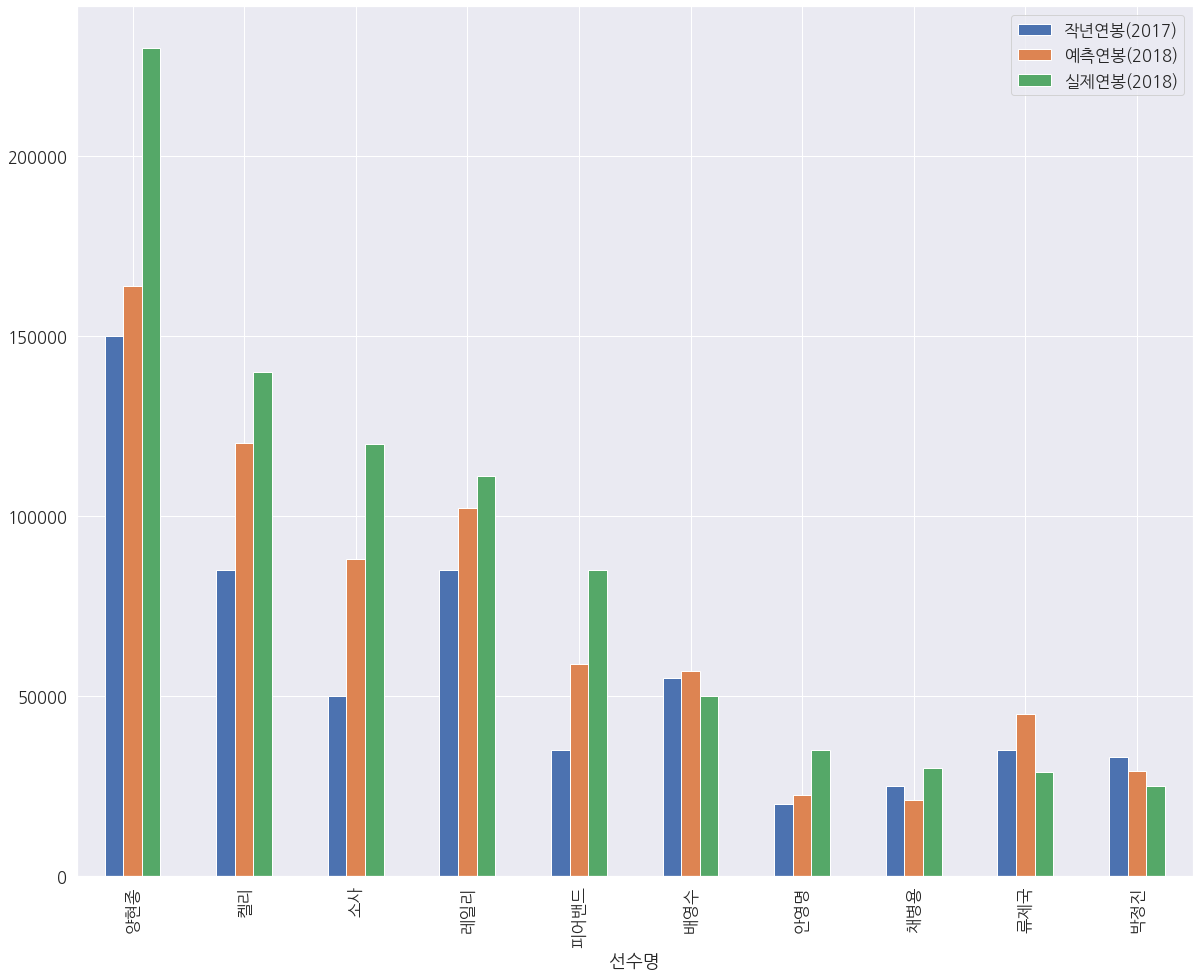

In [96]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
# mpl.rc('font', family='NanumGothicOTF')
mpl.rc('font', family='NanumGothic')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar");

# 학습한 회귀모델은 피처가 많지 않아도 연봉 상승의 전체적인 경향을 비교적 잘 나타냄

---

#### [참고] 일반적인 (설명 목적의) 회귀분석 절차  

(1) 데이터 경향성 확인  
    - 목표변수와 설명변수 간 산점도 분석 및 상관관계 분석을 통해 데이터 경향성 확인  
    
(2) 모델 적합성 확인	 
    - 분산분석을 통해 모델 적합성 확인  
    - 결정계수 확인을 통해 모델 설명력 확인  
    - 잔차의 기본 가정 확인(잔차의 정규성, 등분산성, 독립성 등)  
    
(3) 회귀계수계산 및 유의성 확인	
    - 설명변수 간 다중공선성 확인  
    - t-검정을 통해 회귀계수의 유의성 확인  
    - 목표변수에 영향을 주는 설명변수 선택 및 해석  
    
(4) 모델 선정	 
    - 모델 적합성, 오차의 기본 가정 확인을 통해 최종 모델 선정   

#### [심화 학습] 피처 선택 방법 - RFE (recursive feature elimination)
- Backward 방식중 하나로, 모든 변수를 우선 다 포함시킨 후, 중요도가 낮은 변수를 하나씩 제거하면서 반복적으로 더 적은 수의 변수 조합을 찾아나가는 방식

##### [개인과제 2 - RFE 변수 선택 예시 코드]  
VIF 기준을 적용하거나 아래 RFE 방법 및 기타 자신이 공부한 다른 방법을 적용하여 피처 엔지니어링(변수 선택 작업) 작업을 해보고 최종 도출된 모델에 대한 성능 평가 결과를 간단하게 정리해보세요.

In [100]:
from sklearn.feature_selection import RFE

X = pitcher_df[pitcher_df.columns.difference(['선수명', 'y'])]   # '선수명', 'y' 제외
y = pitcher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

lr = linear_model.LinearRegression()
rfe = RFE(lr, n_features_to_select = 8)  # 8: n_features_to_select
fit = rfe.fit(X_train, y_train)

print("Features:", X_train.columns)   
print("Num Features: %d" % fit.n_features_)   
print("Selected Features T/F: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Features: Index(['BABIP', 'ERA', 'FIP', 'KIA', 'KT', 'LG', 'LOB%', 'NC', 'RA9-WAR', 'SK',
       'WAR', 'kFIP', '경기', '두산', '롯데', '볼넷/9', '블론', '삼성', '삼진/9', '선발', '세',
       '승', '연봉(2017)', '예측연봉(2018)', '이닝', '패', '한화', '홀드', '홈런/9'],
      dtype='object')
Num Features: 8
Selected Features T/F: [False False  True False False False False False False False  True  True
 False False False  True False False  True False False False  True False
 False False  True False  True]
Feature Ranking: [ 9 19  1  8  3 12 10 14  4 17  1  1  6 11 18  1  7  2  1  5 20 21  1 22
 13 15  1 16  1]
